In [1]:
import numpy as np
import matplotlib.pyplot as plt
from analysis_tes import *

In [42]:
n_sims = 10_000 #Number of phonons, proportional to energy

d1 = 2 # cm 
d2 = 2 # cm
z = 0.04 # cm

#By dividing by the dimensions we see the box as +- 1/2 on all sides
v_fast = 1.1 / (z) #1/mus double check this
v_slow = 0.6 / (d1) #1/mus double check this

w = (0.1/2/d1) #TES dimension is 1 x 1 mm^2 = 0.1 x 0.1 cm^2 express it as a fraction of the linear box dimensions /2 for radius

p_abs = 0.0064  #probability of being absorbed => generalize to array using np random choice non 1D shape (check documentation)

dt = 0.5 #time step of simulation (mus)

In [3]:
#Active
wall_top = np.array((0, 0, 1/2))
wall_bottom = np.array((0, 0, -1/2))
wall_left = np.array((0, -1/2, 0))
wall_right = np.array((0, 1/2, 0))
wall_up = np.array((1/2, 0, 0))
wall_down = np.array((-1/2, 0, 0))

normal_top = np.array((0, 0, -1))
normal_bottom = np.array((0, 0, 1))
normal_left = np.array((0, 1, 0))
normal_right = np.array((0, -1, 0))
normal_up = np.array((-1, 0, 0))
normal_down = np.array((1, 0, 0))

TES_1_position = np.array( (1/2-w, 1/2-w, 1/2) )
TES_2_position = np.array( (-1/2+w, -1/2+w, 1/2) )

wall_positions = np.array([wall_top, wall_bottom, wall_left, wall_right, wall_up, wall_down])
wall_normals = np.array([normal_top, normal_bottom, normal_left, normal_right, normal_up, normal_down])
detector_positions = np.array([TES_1_position, TES_2_position])
detector_normals = np.array([normal_top, normal_top])

detector_labels = ["TES_1", "TES_2"]

crystal_geometry = Geometry_TES( wall_positions, detector_positions, wall_normals, detector_normals, detector_labels, w )

In [37]:
from itertools import product

list_n_sims = [500, 800, 1_000, 1500, 2000, 3000]

n = 20
dx = np.linspace( 1/2-w, -1/2+w, n ) #np.linspace(-1/2 + 0.05, 1/2 - 0.05, n)
dy = np.linspace( 1/2-w, -1/2+w, n ) #np.linspace(-1/2 + 0.05, 1/2 - 0.05, n)
dz = [-1/2+w] #top and bot events

initial_positions = np.array(list(product(dx, dy, dz)))

charges_n_sims = []

analysis = Analysis_TES(v_fast, v_slow, p_abs, crystal_geometry)

for n_sims in list_n_sims:
    charges_arr = []
    analysis.n_sims = n_sims
    simulation_id = 0   
    print(f"Started number of simulations: {n_sims}")
    for pos_in in initial_positions:
        simulation_id += 1
        val = int(simulation_id/len(initial_positions)*100)
        if val%25 == 0:
            print(f"Progress {val:.0f}")
        _, absorbed_phonons_1 = analysis.simulation(pos_in)
        hist_phonons_1, edges_ss =  analysis.build_hist(absorbed_phonons_1) #Treat this as a baseline
        charges = np.sum(hist_phonons_1, 1)
        charges_arr.append(charges)
    charges_n_sims.append([n_sims, charges_arr])

charges_arr = np.array(charges_arr)

Started number of simulations: 500


c:\Users\ludov\OneDrive\Desktop\CRESST\PhononSimulation\Two_Disk_Intersection\CRESST_SIMULATIONS\analysis_tes.py:6: RuntimeWarning: divide by zero encountered in divide
  t = (np.einsum('ik,ijk->ji', n_box, -y0+p0[:, None])/(dir@n_box.T) ).T
c:\Users\ludov\OneDrive\Desktop\CRESST\PhononSimulation\Two_Disk_Intersection\CRESST_SIMULATIONS\analysis_tes.py:15: RuntimeWarning: invalid value encountered in multiply
  return (p_0 + t * dir)


Progress 6
Progress 12
Progress 19
Progress 25
Progress 31
Progress 38
Progress 44
Progress 50
Progress 56
Progress 62
Progress 69
Progress 75
Progress 81
Progress 88
Progress 94
Progress 100
Started number of simulations: 800
Progress 6
Progress 12
Progress 19
Progress 25
Progress 31
Progress 38
Progress 44
Progress 50
Progress 56
Progress 62
Progress 69
Progress 75
Progress 81
Progress 88
Progress 94
Progress 100
Started number of simulations: 1000
Progress 6
Progress 12
Progress 19
Progress 25
Progress 31
Progress 38
Progress 44
Progress 50
Progress 56
Progress 62
Progress 69
Progress 75
Progress 81
Progress 88
Progress 94
Progress 100
Started number of simulations: 1500
Progress 6
Progress 12
Progress 19
Progress 25
Progress 31
Progress 38
Progress 44
Progress 50
Progress 56
Progress 62
Progress 69
Progress 75
Progress 81
Progress 88
Progress 94
Progress 100
Started number of simulations: 2000
Progress 6
Progress 12
Progress 19
Progress 25
Progress 31
Progress 38
Progress 44
Progre

In [49]:
diff

array([[ 0.   ,  0.   , -0.975],
       [ 0.   , -0.05 , -0.975],
       [ 0.   , -0.1  , -0.975],
       ...,
       [-0.95 , -0.85 , -0.975],
       [-0.95 , -0.9  , -0.975],
       [-0.95 , -0.95 , -0.975]])

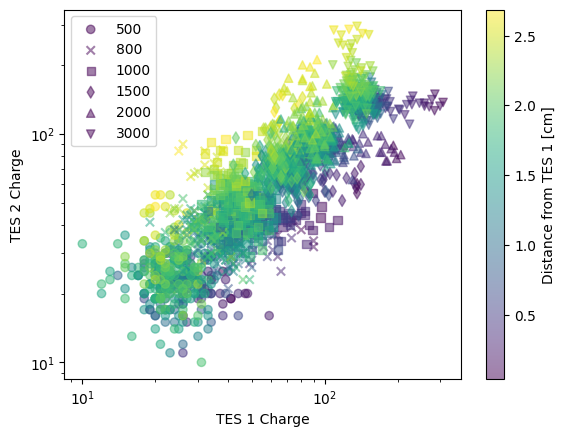

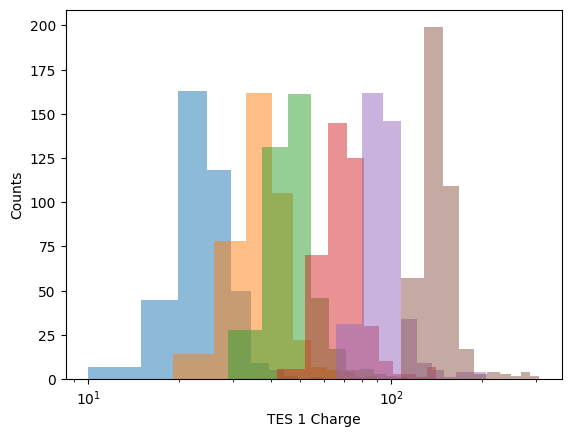

In [48]:
#distance from TES vs charge
diff = initial_positions - TES_1_position
scaled_diff = diff * np.array([d1, d2, z])
distances =  (scaled_diff)**2
distances =  (distances.sum(1))**0.5

points_style = ['o', 'x', 's', 'd', '^', 'v', '<', '>', 'p', 'h']

for p in charges_n_sims:
    n = p[0]
    charges = np.array(p[1])
    plt.scatter( charges[:,0].flatten(), charges[:,1].flatten(), alpha=0.5, label=n, c=distances, marker=points_style.pop(0))
# plt.scatter( charges_xyz[:,:,0,0].flatten(), charges_xyz[:,:,0,1].flatten(), alpha=0.5)

plt.xlabel("TES 1 Charge")
plt.ylabel("TES 2 Charge")
plt.legend()
plt.xscale("log")
plt.yscale("log")
plt.colorbar(label="Distance from TES 1 [cm]")
plt.savefig(f"banana_energies.pdf")
plt.show()

#histogram of the charges
for p in charges_n_sims:
    n = p[0]
    charges = np.array(p[1])
    plt.hist( charges[:,0].flatten(), bins=10, alpha=0.5, label=n)

plt.xscale("log")
plt.xlabel("TES 1 Charge")
plt.ylabel("Counts")
plt.savefig(f"hist_charges.pdf")
plt.show()

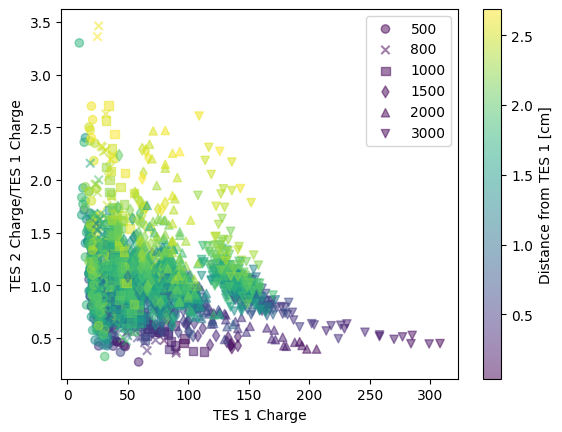

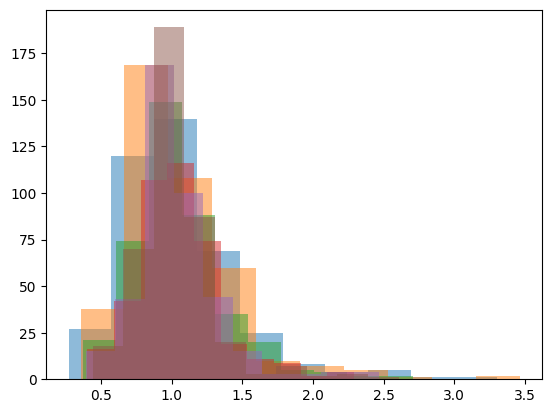

In [52]:
#distance from TES vs charge
diff = initial_positions - TES_1_position
scaled_diff = diff * np.array([d1, d2, z])
distances =  (scaled_diff)**2
distances =  (distances.sum(1))**0.5

points_style = ['o', 'x', 's', 'd', '^', 'v', '<', '>', 'p', 'h']

for p in charges_n_sims:
    n = p[0]
    charges = np.array(p[1])
    plt.scatter( charges[:,0].flatten(), charges[:,1].flatten()/charges[:,0].flatten(), alpha=0.5, label=n, c=distances, marker=points_style.pop(0))
# plt.scatter( charges_xyz[:,:,0,0].flatten(), charges_xyz[:,:,0,1].flatten(), alpha=0.5)

plt.xlabel("TES 1 Charge")
plt.ylabel("TES 2 Charge/TES 1 Charge")
plt.legend()
#plt.xscale("log")
#plt.yscale("log")
plt.colorbar(label="Distance from TES 1 [cm]")
plt.savefig(f"banana_energies_ratio.pdf")
plt.show()

#histogram of the ratio
for p in charges_n_sims:
    n = p[0]
    charges = np.array(p[1])
    plt.hist( charges[:,1].flatten()/charges[:,0].flatten(), bins=10, alpha=0.5, label=n)
plt.show()

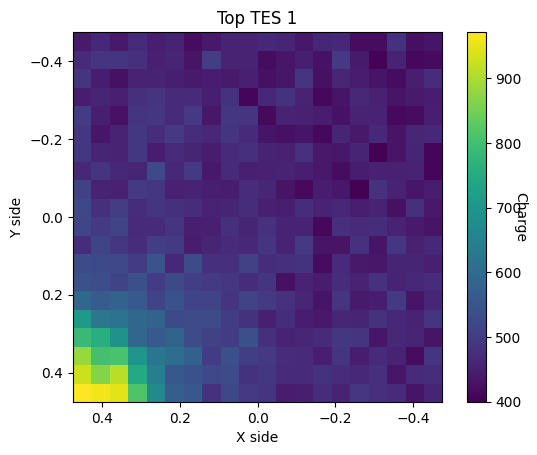

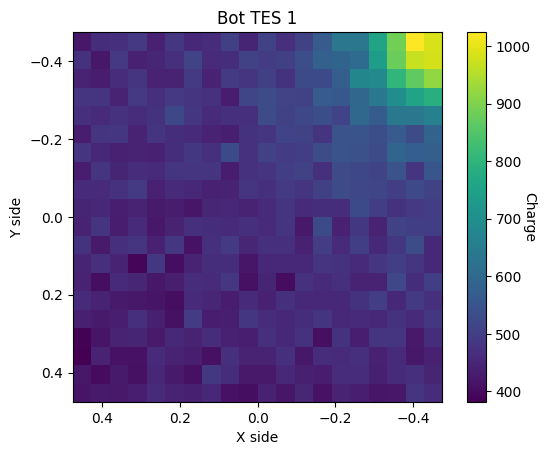

In [42]:
charges_xyz = charges_arr.reshape( (len(dx), len(dy), len(dz), 2) )

plt.imshow( charges_xyz[:,:,:,0], origin='lower', extent=[dx[0], dx[-1], dy[0], dy[-1]] )
plt.title("Top TES 1")
cbar = plt.colorbar()
cbar.set_label("Charge", rotation=270)
plt.xlabel("X side")
plt.ylabel("Y side")
plt.show()

plt.imshow( charges_xyz[:,:,:, 1], origin='lower', extent=[dx[0], dx[-1], dy[0], dy[-1]] )
plt.title("Bot TES 1")
cbar = plt.colorbar()
cbar.set_label("Charge", rotation=270)
plt.xlabel("X side")
plt.ylabel("Y side")
plt.show()

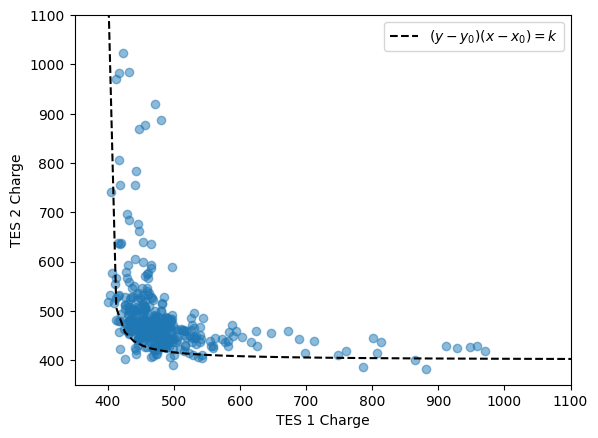

In [97]:

#scatter plot of charges
charges_linear = np.linspace( 400, 1700, 100 )

plt.scatter( charges_xyz[:,:,0,0].flatten(), charges_xyz[:,:,0,1].flatten(), alpha=0.5)
plt.plot( charges_linear, 400 + 1600 / (charges_linear - 398), 'k--', label="$(y-y_0)(x-x_0)=k$")

plt.xlabel("TES 1 Charge")
plt.ylabel("TES 2 Charge")
plt.legend()
plt.ylim(350, 1100)
plt.xlim(350, 1100)
plt.savefig(f"banana{n}_edges.pdf")
plt.show()

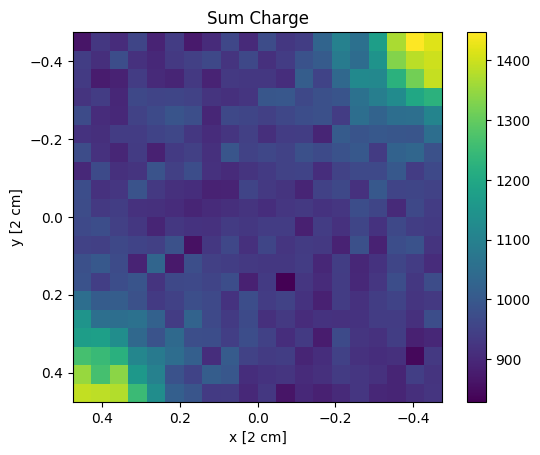

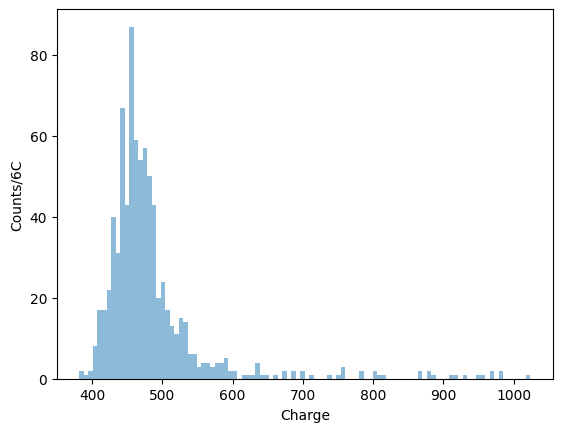

In [103]:
plt.imshow( charges_xyz[:,:,0].sum(2), origin='lower', extent=[dx[0], dx[-1], dy[0], dy[-1]] )
plt.title("Sum Charge")
plt.colorbar()
plt.xlabel(f"x [{d1} cm]")
plt.ylabel(f"y [{d1} cm]")
plt.show()

hist_charge = charges_xyz[:,:,:].sum(2).flatten()
diff = max(hist_charge) - min(hist_charge)
plt.hist( charges_xyz[:,:,:].sum(2).flatten(), bins=100, alpha=0.5, label="Top side")
plt.ylabel(f"Counts/{diff/100:.0f}C")
plt.xlabel(f"Charge")
plt.show()

In [45]:
np.save(f"charges_xyz_excess_{n}.npy", charges_xyz)

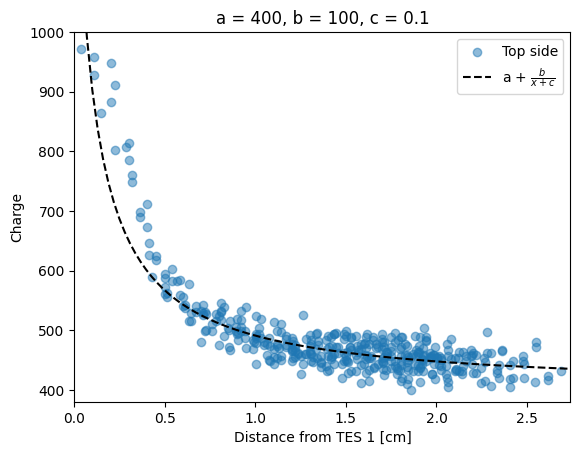

In [96]:
#distance from TES vs charge
diff = initial_positions - TES_1_position
scaled_diff = diff * np.array([d1, d2, z])
distances =  (scaled_diff)**2
distances =  (distances.sum(1))**0.5

x_vals = np.linspace(min(distances), max(distances)+0.3, 100)
plt.scatter( distances, charges_arr[:,0], alpha=0.5, label="Top side")
plt.plot( x_vals, 400 + 100/(x_vals+0.1), "--k", label=f"a + $\\frac{{b}}{{x+c}}$" )
plt.title("a = 400, b = 100, c = 0.1")
plt.xlabel("Distance from TES 1 [cm]")
plt.ylabel("Charge")
plt.legend()
plt.xlim(0, 2.74)
plt.ylim(380, 1000)
plt.show()


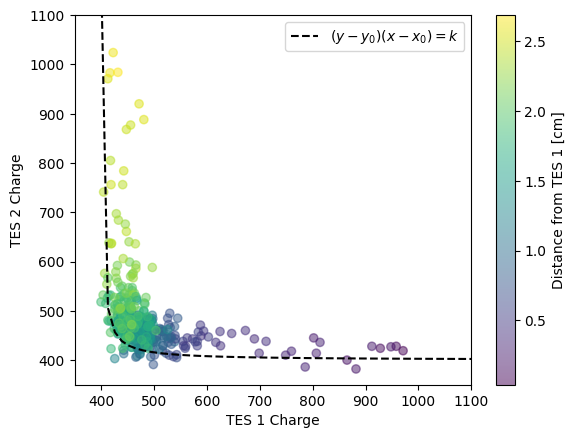

In [64]:

#scatter plot of charges
charges_linear = np.linspace( 400, 1700, 100 )

plt.scatter( charges_xyz[:,:,0,0].flatten(), charges_xyz[:,:,0,1].flatten(), c=distances, alpha=0.5)
plt.plot( charges_linear, 400 + 1600 / (charges_linear - 398), 'k--', label="$(y-y_0)(x-x_0)=k$")

plt.xlabel("TES 1 Charge")
plt.ylabel("TES 2 Charge")
plt.legend()
plt.ylim(350, 1100)
plt.xlim(350, 1100)
plt.colorbar(label="Distance from TES 1 [cm]")
plt.savefig(f"banana{n}_edges_distances.pdf")
plt.show()

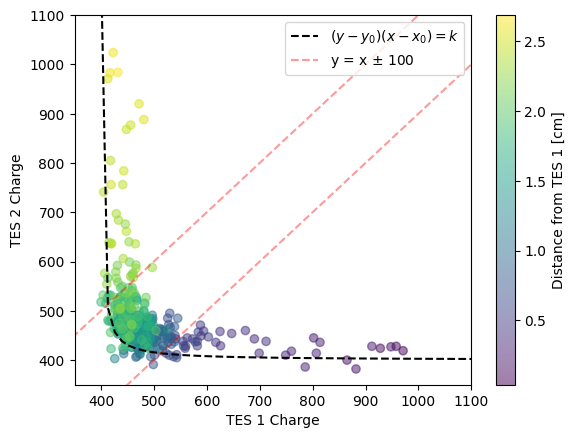

In [109]:
charges_linear = np.linspace( 400, 1700, 100 )
lines = np.linspace(300, 1700, 100)

plt.scatter( charges_xyz[:,:,0,0].flatten(), charges_xyz[:,:,0,1].flatten(), c=distances, alpha=0.5)
plt.plot( charges_linear, 400 + 1600 / (charges_linear - 398), 'k--', label="$(y-y_0)(x-x_0)=k$")
plt.plot( lines, lines - 100, 'r--', label="y = x $\pm$ 100", alpha=0.4)
plt.plot( lines, lines + 100, 'r--', alpha=0.4)


plt.xlabel("TES 1 Charge")
plt.ylabel("TES 2 Charge")
plt.legend(loc='upper right')
plt.ylim(350, 1100)
plt.xlim(350, 1100)
plt.colorbar(label="Distance from TES 1 [cm]")
plt.savefig(f"banana{n}_edges_distances.pdf")
plt.show()

In [58]:
temp = charges_xyz[:,:,0,0].flatten()
print( len(temp[temp < 600])/len(temp) )

0.945


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


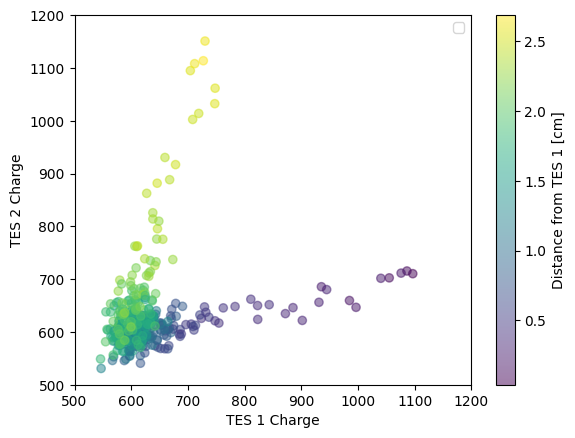

In [65]:
#scatter plot of charges
charges_linear = np.linspace( 400, 1700, 100 )
temp_0 = charges_xyz[:,:,0,0].flatten()
temp_1 = charges_xyz[:,:,0,1].flatten()

temp_0_new = temp_0 + 0.3 * temp_1
temp_1_new = temp_1 + 0.3 * temp_0

plt.scatter( temp_0_new, temp_1_new, c=distances, alpha=0.5)
#plt.plot( charges_linear, 400 + 1600 / (charges_linear - 398), 'k--', label="$(y-y_0)(x-x_0)=k$")

plt.xlabel("TES 1 Charge")
plt.ylabel("TES 2 Charge")
plt.legend()
plt.ylim(500, 1200)
plt.xlim(500, 1200)
plt.colorbar(label="Distance from TES 1 [cm]")
plt.savefig(f"boomerang_{n}_edges_distances_thermal.pdf")
plt.show()